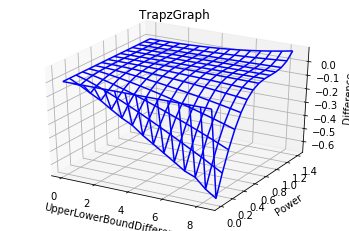

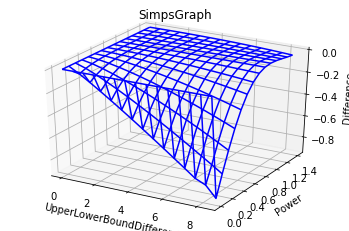

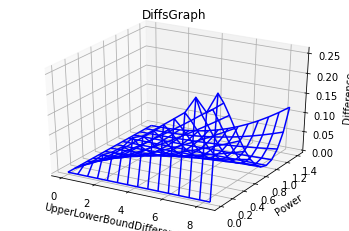

In [27]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


#Settings
NumberOfIterations = 15
NumberOfSegments = 10
PowerIncrement = 0.1
BoundIncrement = 0.3

#Don't touch
LowerBound = 1
UpperBound = 1

class Integration:
    def __init__(self,f,a,b,N):
        self.f = f
        self.a = a
        self.b = b
        self.N = N

    def Trapz(self):    
        SubIntervals = self.GetSubInvtervals()
        #y = self.f(x)
        RightEndPoints = SubIntervals[1:]
        LeftEndPoints = SubIntervals[:-1]
        TotalArea = 0
        SegmentWidth = (self.b - self.a)/self.N
        for i in range(len(RightEndPoints)):
            TopperTriangleArea = SegmentWidth/2 * (self.f(RightEndPoints[i]) - self.f(LeftEndPoints[i]))
            RectangleArea = 0
            if RightEndPoints[i] > LeftEndPoints[i]:
                RectangleArea = SegmentWidth * self.f(LeftEndPoints[i])
            else:
                RectangleArea = SegmentWidth * self.f(RightEndPoints[i])
            TotalArea = TotalArea + RectangleArea + TopperTriangleArea
        return TotalArea

    def GetSubInvtervals(self):
        SubIntervalList = []
        for i in range(0,self.N+1):
            Value = self.a + i*(self.b - self.a)/self.N
            SubIntervalList.append(Value)    
        return SubIntervalList

    def Simps(self):
        SegmentWidth = (self.b - self.a)/self.N
        sum = self.f(self.b) + self.f(self.a)
        for i in range(1,int(self.N)):
            if i % 2:
                sum += 4*self.f(self.a+i*SegmentWidth)
            else:
                sum += 2*self.f(self.a+i*SegmentWidth)
        return sum*SegmentWidth/3

class FunctionHandling:
    def __init__(self, Coefficient, Power):
        self.Coefficient = Coefficient
        self.Power = Power
   
    def GetFunction(self):
        return lambda x : self.Coefficient*x**self.Power
    def GetValue(self, LowerBound, UpperBound):
        LowerIntegral = None
        if LowerBound == 0:
            LowerIntegral = 0
        else:
            LowerIntegral = ((self.Coefficient)*LowerBound**(self.Power+1))/(self.Power+1)
        
        UpperIntegral = None
        if UpperBound == 0:
            UpperIntegral = 0
        else:
            UpperIntegral = ((self.Coefficient)*UpperBound**(self.Power+1))/(self.Power+1)
        return (UpperIntegral - LowerIntegral)

class Graph:
    def __init__(self, XData, YData, ZData):
        self.XData = XData
        self.YData = YData
        self.ZData = ZData
    def ThreeDimensionalGraph(self, Name):
        fig = plt.figure()
        ax = plt.axes(projection='3d')  
        #ax.plot_surface(self.XData, self.YData, self.ZData, rstride=1, cstride=1,
        #cmap='viridis', edgecolor='none')
        #ax.contour3D(self.XData, self.YData, self.ZData, 50, cmap='binary')
        ax.set_xlabel('UpperLowerBoundDifference')
        ax.set_ylabel('Power')
        ax.set_zlabel('Difference')
        ax.set_title(Name)
        ax.plot_wireframe(self.XData, self.YData, self.ZData, color='blue')

class Main:
    def __init__(self, LowerBound, UpperBound, NumberOfSegments, NumberOfIterations):
        self.LowerBound = LowerBound
        self.UpperBound = UpperBound
        self.NumberOfSegments = NumberOfSegments
        self.NumberOfIterations = NumberOfIterations
        self.XData = [] #UpperLowerBoundDifferenceList
        for i in range(NumberOfIterations):
            ListToAppend = []
            for j in range(NumberOfIterations):
                ListToAppend.append(i*2*BoundIncrement)
            ListToAppend = np.array(ListToAppend)
            self.XData.append(ListToAppend)
        self.YData = []#Powerlist
        for i in range(NumberOfIterations):
            ListToAppend = []
            for j in range(NumberOfIterations):
                ListToAppend.append(j*PowerIncrement)
            ListToAppend = np.array(ListToAppend)
            self.YData.append(ListToAppend)
        self.ZData = []#SimpsDifference

    def Trapz(self):
        for i in range(self.NumberOfIterations):
            ListToAppend = []
            for j in range (self.NumberOfIterations):
                self.FunctionToIntegrate = FunctionHandling(1, j*PowerIncrement).GetFunction()
                Integrate = Integration(self.FunctionToIntegrate, -i*BoundIncrement, i*BoundIncrement, self.NumberOfSegments)
                Estimate = Integrate.Trapz()
                Difference = Estimate - FunctionHandling(1, j*PowerIncrement).GetValue(-i*BoundIncrement, i*BoundIncrement)
                ListToAppend.append(Difference)
                #self.ZData.append(Difference)
            #ListToAppend = np.array(ListToAppend)
            ListToAppend = np.array(ListToAppend)
            self.ZData.append(ListToAppend)
    def Simps(self):
        for i in range(self.NumberOfIterations):
            ListToAppend = []
            for j in range (self.NumberOfIterations):
                self.FunctionToIntegrate = FunctionHandling(1, j*PowerIncrement).GetFunction()
                Integrate = Integration(self.FunctionToIntegrate, -i*BoundIncrement, i*BoundIncrement, self.NumberOfSegments)
                Estimate = Integrate.Simps()
                Difference = Estimate - FunctionHandling(1, j*PowerIncrement).GetValue(-i*BoundIncrement, i*BoundIncrement)
                ListToAppend.append(Difference)
                #self.ZData.append(Difference)
            #ListToAppend = np.array(ListToAppend)
            ListToAppend = np.array(ListToAppend)
            self.ZData.append(ListToAppend)

TrapzData = Main(LowerBound, UpperBound, NumberOfSegments, NumberOfIterations)
TrapzData.Trapz()
X = np.array(getattr(TrapzData, 'XData'))
Y = np.array(getattr(TrapzData, 'YData'))
Z = np.array(getattr(TrapzData, 'ZData'))
TrapzGraph = Graph(X,Y,Z)
TrapzGraph = TrapzGraph.ThreeDimensionalGraph('TrapzGraph')

SimpsData = Main(LowerBound, UpperBound, NumberOfSegments, NumberOfIterations)
SimpsData.Simps()
X1 = np.array(getattr(SimpsData, 'XData'))
Y1 = np.array(getattr(SimpsData, 'YData'))
Z1 = np.array(getattr(SimpsData, 'ZData'))
SimpsGraph = Graph(X1,Y1,Z1)
SimpsGraph = SimpsGraph.ThreeDimensionalGraph('SimpsGraph')

Z2 = Z - Z1
DiffsGraph = Graph(X1,Y1,Z2)
DiffsGraph = DiffsGraph.ThreeDimensionalGraph('DiffsGraph')

#print(Z)
#print(Z1)